# Retraining Classifier
In the previous examples, the classifier was only trained in the first generation, here it is trained on every iteration...

In [1]:
import sys
import numpy as np
sys.path.append("../")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from aif360.algorithms.inprocessing import PrejudiceRemover

from long_term_fairness.ltf_plot import LongTermFairnessPlot
from long_term_fairness.ltf_data.individual_data_generator import DataGenerator as IndDataGen
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
class CLF:
    def __init__(self, clf=LogisticRegression()):
        self.c = clf
    def predict(self, X, X_s):
        return self.c.predict(X)
    def fit(self, X, X_s, y):
        self.c.fit(X, y)   

## 1. Unconstrained Example
First, a unconstrained linear svm is trained. In the first generation, both baseline and true data are identical.
Because the svm is unconstrained, it perfectly distinguishes the data points. Hence, the number of positive and negative labels does not change with time. Contrary, in the baseline data (generated assuming all previous predictions of each individual were positive) all data points are considered positive.

In [4]:
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=50,
                       num_negative_label=50,
                       discrimination_factor=.9)

In [5]:
metric = AifLongTermMetric()

In [6]:
clf = CLF(LinearSVC())

In [7]:
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13], update_clf=True)

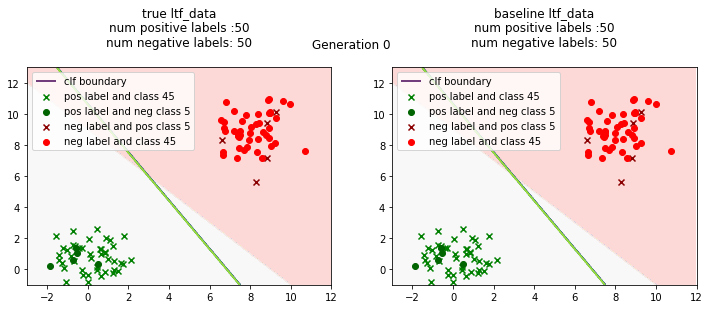

In [8]:
l.init_data()
l.plot_generation()

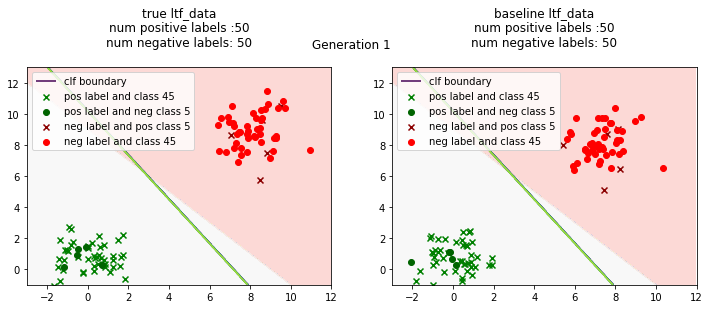

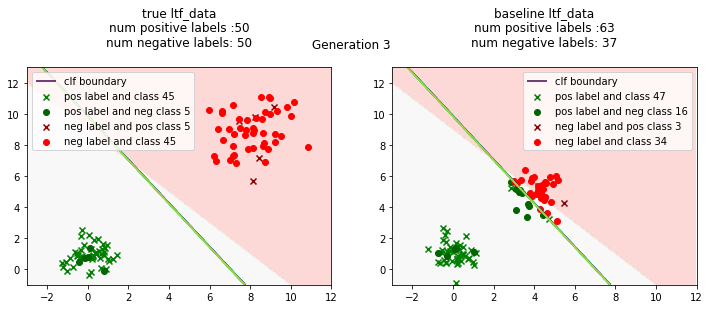

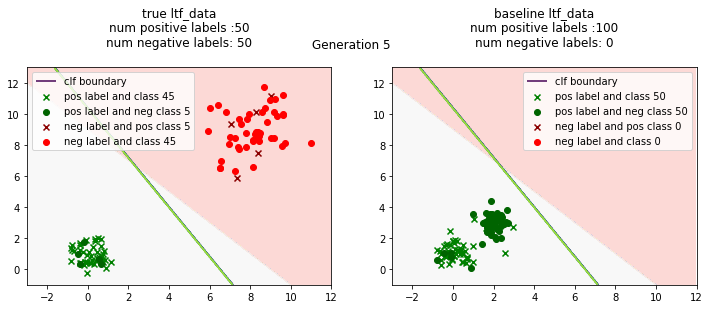

In [9]:
for i in range(6):
    l.run_generation()
    l.run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

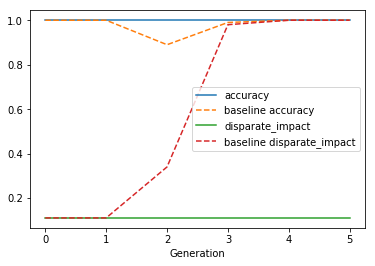

In [10]:
l.plot_ltf(metric._metrics)

From above plot it is visible, that accuracy and disparate impact are constant over time in the true case, while disparate impact improves in the baseline case. 

## 2. Constrained Example 
The constrained classifier learns another decision boundary and has to except errors to satisfy fairness. This example is done using an artificial rule.

In [11]:
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[15, 16],
                       cov_neg= [[6, 0],[0, 7]], 
                       num_positive_label=50,
                       num_negative_label=50,
                       discrimination_factor=.9,
                       local_variance=[[0.001, 0], [0, 0.001]])

clf = AifLongTermPrediction(PrejudiceRemover())

l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 20], y_lim=[-1, 20], update_clf=True)

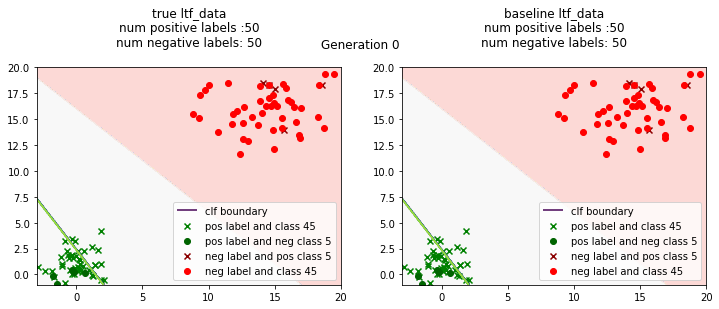

In [12]:
l.init_data()
l.plot_generation()

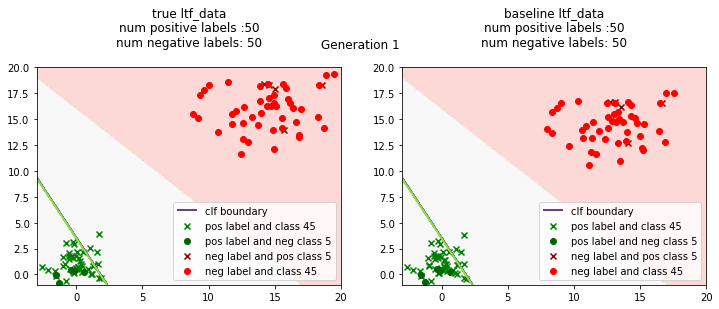

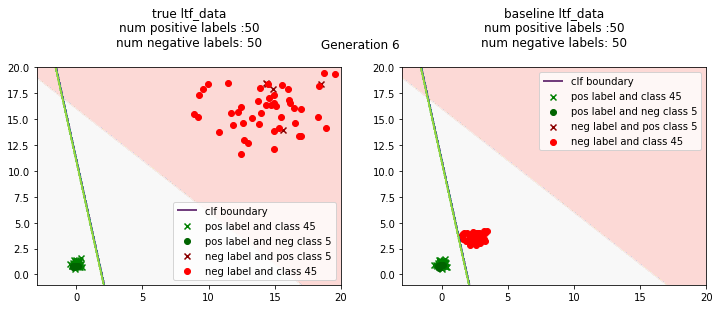

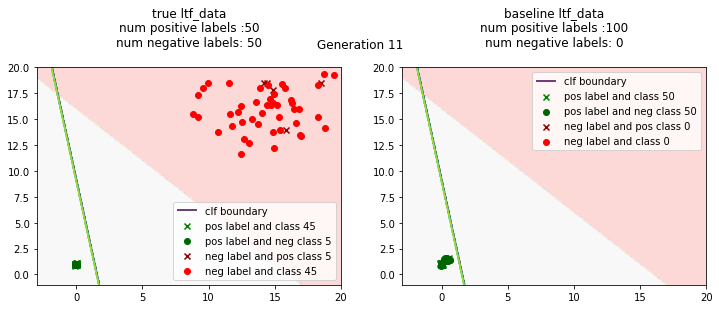

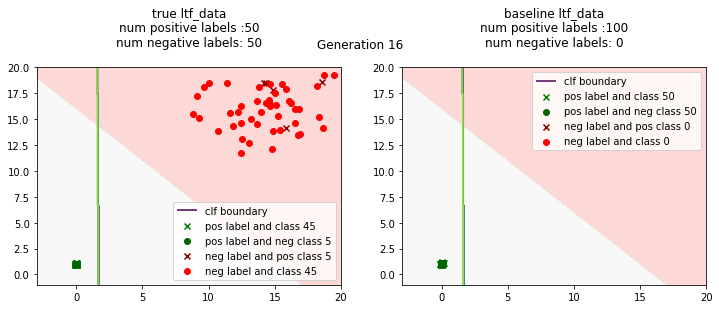

In [13]:
for i in range(20):
    l.run_generation()
    l.run_baseline_generation()
    if i % 5 == 0:
        l.plot_generation()

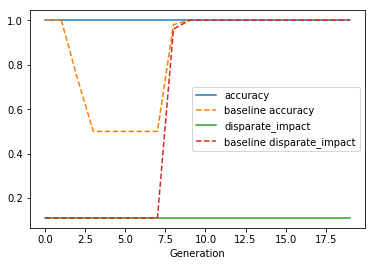

In [14]:
l.plot_ltf(metric._metrics)

In [ ]:
l.plot_generation()

In the lower variance example, individuals do not cross the decision boundary and are therefore never move towards the positive center.